## looking through modular implementation of yolo via jakarta team 2018 and cvlib
starting with the simplest version

In [91]:
import os
import numpy as np
import cv2
import tensorflow as tf
from cvlib.object_detection import draw_bbox


###
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wd_original = os.getcwd()
print(wd_original)

C:\Users\joh3146\Documents\dssg\air_pollution_estimation\notebooks


In [142]:
# upload video and read with cv2
os.chdir(wd_original)
vidcap = cv2.VideoCapture('../data/01_raw/jamcams/2019-06-30_03-00-15.580143_00001.03601.mp4')
imcap = cv2.imread('../data/01_raw/jamcams/frame001.jpg')
success, image = vidcap.read()

print(image.shape, type(image))

(288, 352, 3) <class 'numpy.ndarray'>


## 1. test out the pieces of the cvlib function

import labels and weights (labeled data, model), import video, construct neural network, run on neural network

In [6]:
def describe_video(cap):
    """Describes the physical attributes of the video capture
    """

    cap_dict = {}
    cap_dict['width'] = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    cap_dict['height'] = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap_dict['fps'] = int(cap.get(cv2.CAP_PROP_FPS))
    cap_dict['n_frames'] = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap_dict['time_length'] = cap_dict['n_frames'] / cap_dict['fps']
    
    return cap_dict

In [7]:
vidcap_dict = describe_video(vidcap)
vidcap_dict

{'fps': 25, 'height': 288, 'n_frames': 239, 'time_length': 9.56, 'width': 352}

In [14]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

def populate_model():
    """import classification model definitions"""
    
    config_file_name = '../conf/yolov3-tiny/yolov3-tiny.cfg'
    weights_file_name = '../conf/yolov3-tiny/yolov3-tiny.weights'
    
    return config_file_name, weights_file_name

    
def populate_labels():
    "import labels for classification"
    
    class_file_name = '../conf/yolov3-tiny/coco.names'
    f = open(class_file_name, 'r')
    labels = [line.strip() for line in f.readlines()]

    return labels

# cv2.dnn.readNetFromTorch
# cv2.dnn.createTorchImporter

these could be the subfunctions of the function

In [52]:
# cnn resizing required so that there is matching, probably specific to yolo?
scale = 0.00392
blob = cv2.dnn.blobFromImage(imcap_test, scale, (416,416), (0,0,0), True, crop=False)
blob.shape

(1, 3, 416, 416)

In [63]:
config, weights = populate_model()
net = cv2.dnn.readNet(weights, config)
net.setInput(blob)
preds = net.forward()
preds.shape

(2028, 85)

In [144]:
class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            max_conf = scores[class_id]
            if max_conf > confidence:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(max_conf))
                boxes.append([x, y, w, h])


    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence, nms_thresh)

    bbox = []
    label = []
    conf = []

    for i in indices:
        i = i[0]
        box = boxes[i]
        x, y, w, h = box[:4]
        bbox.append([round(x), round(y), round(x+w), round(y+h)])
        label.append(str(classes[class_ids[i]]))
        conf.append(confidences[i])

IndentationError: unexpected indent (<ipython-input-144-aa4688da66fb>, line 2)

## 2. put the sub-functions into combined functions

In [159]:
def predict_objects_from_image(img):
    
    # import classification model
    config, weights = populate_model()
    
    # convert image to "blob"
    scale = 0.00392 # required scaling for yolo
    blob = cv2.dnn.blobFromImage(img, scale, (416,416), (0,0,0), True, crop=False)
    
    # read model as deep neural network in cvlib
    net = cv2.dnn.readNet(weights, config) # can do other
    
    # input blob to neural network
    net.setInput(blob)
    
    # forward pass of blob through neural network
    predictions = net.forward(get_output_layers(net))
    
    return predictions

In [160]:
predictions_test = predict_objects_from_image(imcap)
len(predictions_test)

2

In [35]:
predictions_test[0].shape

(507, 85)

predictions_test[1]: this is the predictions per grid cell for the 85 labels

In [36]:
predictions_test[1].shape

(2028, 85)

In [28]:
predictions_test[0][0]

array([5.9933528e-02, 3.6335714e-02, 2.0331025e-01, 1.2712038e-01,
       9.7052916e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [29]:
predictions_test[1][0]

array([0.02031709, 0.02320584, 0.02359885, 0.02283483, 0.00050543,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [71]:
def find_most_probable_object(detection):
    confidences = detection[5:]
    most_probable_object_idx = np.argmax(confidences)
    max_confidence = np.max(confidences)
    
    return most_probable_object_idx, max_confidence

def make_box_around_object(detection, imcap):
    imheight = imcap.shape[0]
    imwidth = imcap.shape[1]
    
    center_x = int(detection[0] * imwidth)
    center_y = int(detection[1] * imheight)
    w = int(detection[2] * imwidth)
    h = int(detection[3] * imheight)
    x = center_x - w / 2
    y = center_y - h / 2
    box_def = [w, h, x, y]
    
    return box_def

In [145]:
def describe_best_predictions(predictions, imcap, confidence_threshold): 
    
    predictions_described = {}
    
    predictions_described['class_idxs'] = []
    predictions_described['confidences'] = []
    predictions_described['boxes'] = []

    for prediction in predictions: # loop through prediction layers
        for detection in prediction: # loop through class detection probabilities
            class_idx, max_conf = find_most_probable_object(detection)
            
            if max_conf > confidence_threshold:
                object_box = make_box_around_object(detection, imcap)
                print(object_box)
                
                predictions_described['boxes'].append(object_box)
                predictions_described['class_idxs'].append(class_idx)
                predictions_described['confidences'].append(float(max_conf))
    
    return predictions_described

def reduce_overlapping_predictions(predictions_described, confidence_threshold, nms_threshold):
    object_classes = populate_labels()
    
    indices = cv2.dnn.NMSBoxes(bboxes=predictions_described['boxes'], 
                               scores=predictions_described['confidences'],
                               score_threshold=confidence_threshold,
                               nms_threshold=nms_threshold)
    objects = {}
    objects['bbox'] = []
    objects['label'] = []
    objects['conf'] = []

    for i in indices:
        i = i[0]
        box = predictions_described['boxes'][i]
        w, h, x, y = box[:4]
        objects['bbox'].append([round(x), round(y), round(x+w), round(y+h)])
        objects['label'].append(str(object_classes[predictions_described['class_idxs'][i]]))
        objects['conf'].append(predictions_described['confidences'][i])
        
    return objects

## 3. put into one combined function

In [146]:
def classify_objects_from_image(imgcap, conf_thresh=0.3, nms_thresh=0.4):
    predictions = predict_objects_from_image(imgcap)
    objects_dict = describe_best_predictions(predictions, imgcap, conf_thresh)
    objects_dict_final = reduce_overlapping_predictions(objects_dict, conf_thresh, nms_thresh)
    
    return objects_dict_final

[24, 16, 80.0, 184.0]


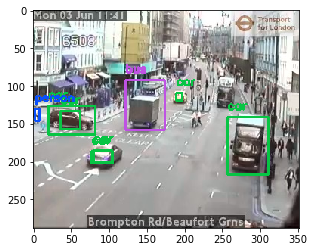

In [147]:
results = classify_objects_from_image(imcap)
results_img = draw_bbox(imcap, results['bbox'], results['label'], results['conf'], colors=None, write_conf=False)
plt.imshow(results_img)

In [154]:
dict_test = {
    'labels': []}
dict_test

{'labels': []}

In [114]:
predictions_test = predict_objects_from_image(imcap)
objects_dict = describe_best_predictions(predictions_test, imcap, 0.1)
# objects_dict

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


cv lib implementation

In [ ]:
import cv2
import os
import numpy as np
from .utils import download_file

initialize = True
net = None
dest_dir = os.path.expanduser('~') + os.path.sep + '.cvlib' + os.path.sep + 'object_detection' + os.path.sep + 'yolo' + os.path.sep + 'yolov3'
classes = None
COLORS = np.random.uniform(0, 255, size=(80, 3))

def populate_class_labels():

    class_file_name = 'yolov3_classes.txt'
    class_file_abs_path = dest_dir + os.path.sep + class_file_name
    url = 'https://github.com/arunponnusamy/object-detection-opencv/raw/master/yolov3.txt'
    if not os.path.exists(class_file_abs_path):
        download_file(url=url, file_name=class_file_name, dest_dir=dest_dir)
    f = open(class_file_abs_path, 'r')
    classes = [line.strip() for line in f.readlines()]

    return classes


def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_bbox(img, bbox, labels, confidence, colors=None, write_conf=False):

    global COLORS
    global classes

    if classes is None:
        classes = populate_class_labels()
    
    for i, label in enumerate(labels):

        if colors is None:
            color = COLORS[classes.index(label)]            
        else:
            color = colors[classes.index(label)]

        if write_conf:
            label += ' ' + str(format(confidence[i] * 100, '.2f')) + '%'

        cv2.rectangle(img, (bbox[i][0],bbox[i][1]), (bbox[i][2],bbox[i][3]), color, 2)

        cv2.putText(img, label, (bbox[i][0],bbox[i][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return img
    
def detect_common_objects(image, confidence=0.5, nms_thresh=0.3, model='yolov3'):

    Height, Width = image.shape[:2]
    scale = 0.00392

    global classes
    global dest_dir

    if model == 'yolov3-tiny':
        config_file_name = 'yolov3-tiny.cfg'
        cfg_url = "https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg"
        weights_file_name = 'yolov3-tiny.weights'
        weights_url = 'https://pjreddie.com/media/files/yolov3-tiny.weights'
        blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)


    else:
        config_file_name = 'yolov3.cfg'
        cfg_url = 'https://github.com/arunponnusamy/object-detection-opencv/raw/master/yolov3.cfg'
        weights_file_name = 'yolov3.weights'
        weights_url = 'https://pjreddie.com/media/files/yolov3.weights'
        blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)    

    config_file_abs_path = dest_dir + os.path.sep + config_file_name
    weights_file_abs_path = dest_dir + os.path.sep + weights_file_name    
    
    if not os.path.exists(config_file_abs_path):
        download_file(url=cfg_url, file_name=config_file_name, dest_dir=dest_dir)

    if not os.path.exists(weights_file_abs_path):
        download_file(url=weights_url, file_name=weights_file_name, dest_dir=dest_dir)    

    global initialize
    global net

    if initialize:
        classes = populate_class_labels()
        net = cv2.dnn.readNet(weights_file_abs_path, config_file_abs_path)
        initialize = False

    net.setInput(blob)

    outs = net.forward(get_output_layers(net))

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            max_conf = scores[class_id]
            if max_conf > confidence:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(max_conf))
                boxes.append([x, y, w, h])


    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence, nms_thresh)

    bbox = []
    label = []
    conf = []

    for i in indices:
        i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        bbox.append([round(x), round(y), round(x+w), round(y+h)])
        label.append(str(classes[class_ids[i]]))
        conf.append(confidences[i])
        
    return bbox, label, conf